In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [3]:
# networkxの利用
G = nx.Graph()

G.add_edge("Arigator", "WhiteBear", weight=2)
G.add_edge("Arigator", "Bull", weight=1)
G.add_edge("Bull", "WhiteBear", weight=1)
G.add_edge("Bull", "Shark", weight=3)
G.add_edge("WhiteBear", "Condor", weight=3)
G.add_edge("WhiteBear", "Shark", weight=5)
G.add_edge("Shark", "Condor", weight=4)
print(nx.minimum_spanning_tree(G).edges())

[('Arigator', 'Bull'), ('WhiteBear', 'Bull'), ('WhiteBear', 'Condor'), ('Bull', 'Shark')]


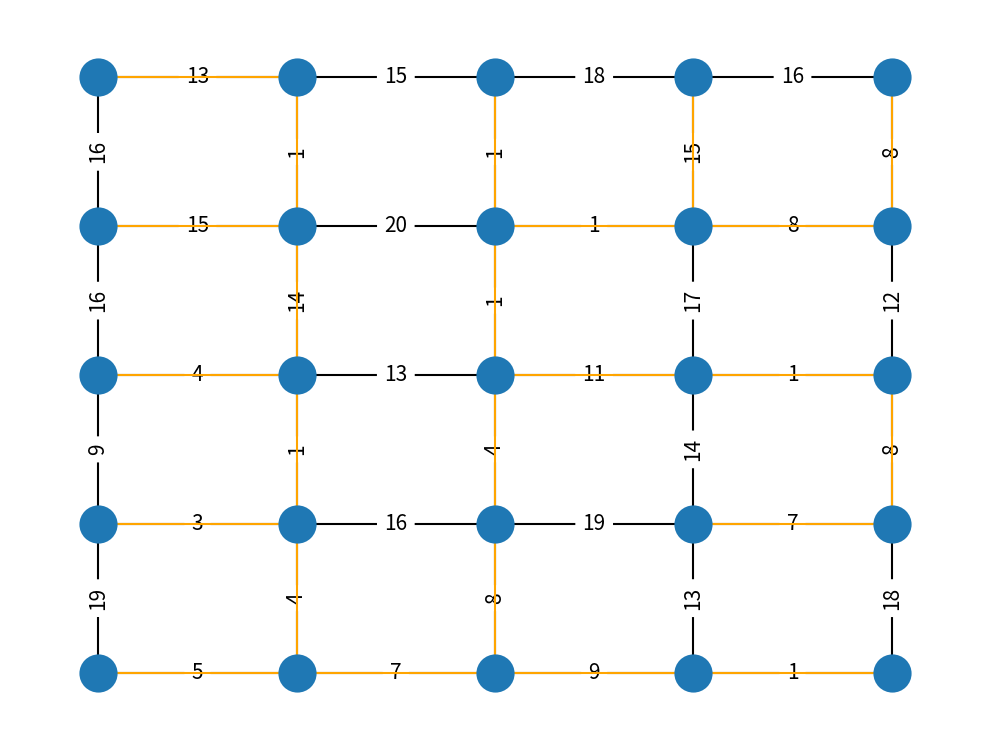

In [5]:
m,n = 5,5
lb, ub = 1, 20

random.seed(1)
G = nx.grid_2d_graph(m,n)
for (i,j) in G.edges():
    G[i][j]["weight"] = random.randint(lb,ub)

pos = {(i,j): (i,j) for (i,j) in G.nodes()}
edges = list(nx.minimum_spanning_edges(G))

plt.figure()
nx.draw(G, pos=pos, node_size=100)
edge_labels = {}

for (i,j) in G.edges():
    edge_labels[i,j] = f"{ G[i][j]['weight'] }"
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(G, pos=pos, width=1, edgelist=edges, edge_color="orange")
plt.show()

weight= [(15, (3, 3), (3, 4)), (15, (0, 3), (1, 3)), (14, (1, 2), (1, 3)), (13, (0, 4), (1, 4)), (11, (2, 2), (3, 2)), (9, (2, 0), (3, 0)), (8, (4, 3), (4, 4)), (8, (4, 1), (4, 2)), (8, (3, 3), (4, 3)), (8, (2, 0), (2, 1)), (7, (3, 1), (4, 1)), (7, (1, 0), (2, 0)), (5, (0, 0), (1, 0)), (4, (2, 1), (2, 2)), (4, (1, 0), (1, 1)), (4, (0, 2), (1, 2)), (3, (0, 1), (1, 1)), (1, (3, 2), (4, 2)), (1, (3, 0), (4, 0)), (1, (2, 3), (3, 3)), (1, (2, 3), (2, 4)), (1, (2, 2), (2, 3)), (1, (1, 3), (1, 4)), (1, (1, 1), (1, 2))]
max distance= 14


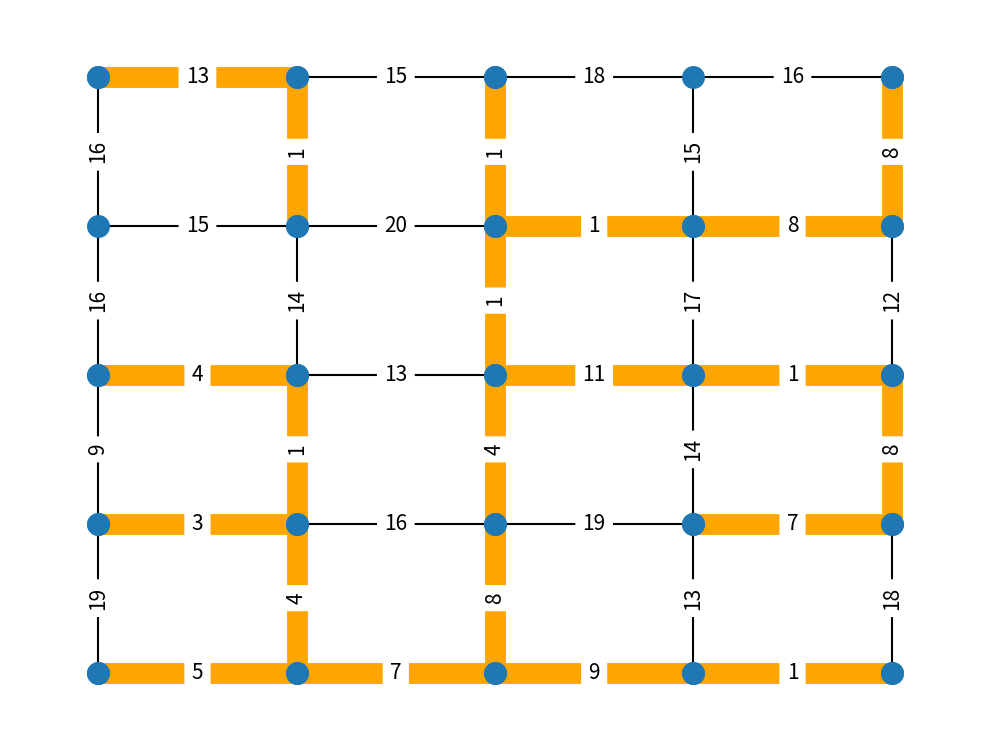

In [10]:
# クラスタ間の最短距離を最大化するk分割問題
weight = []
for (i, j, w) in edges:
    weight.append((w["weight"], i, j))
weight.sort(reverse=True)
print("weight=", weight)
print("max distance=", weight[3-1][0])

G1 = nx.Graph()
for (w, i, j) in weight[3:]:
    G1.add_edge(i,j)

nx.draw(G, pos=pos, node_size=100)

nx.draw(G1, pos=pos, node_size=100, width=10, edge_color="orange")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

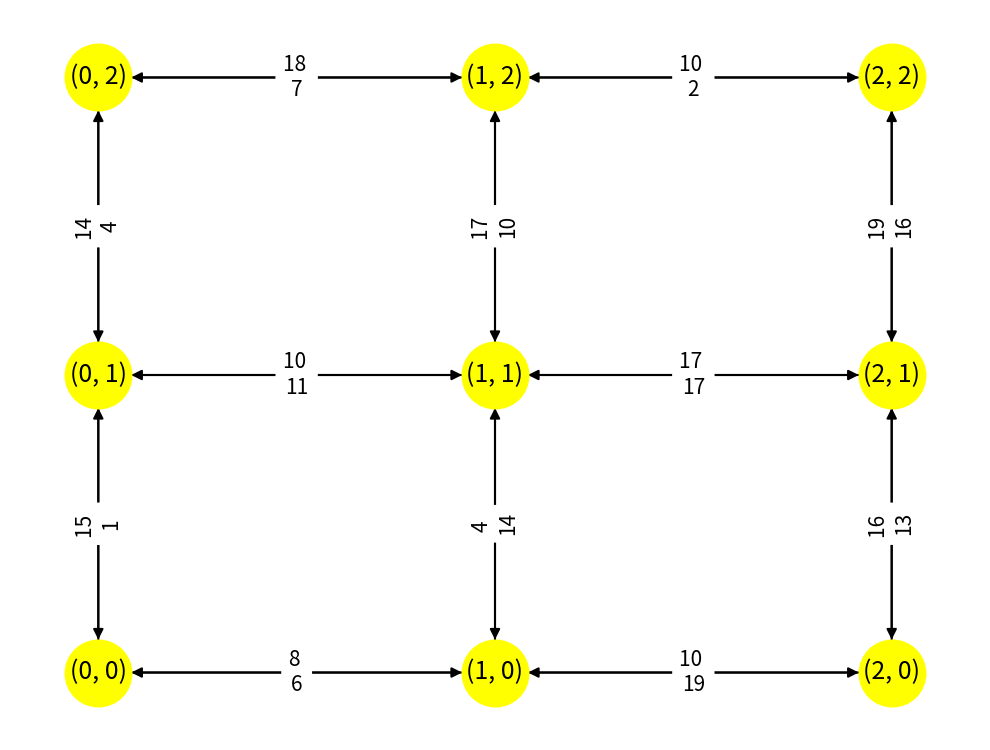

In [11]:
m,n = 3,3
lb,ub = 1, 20
G = nx.grid_2d_graph(m,n)
D = G.to_directed()
for (i,j) in D.edges():
    D[i][j]["weight"] = random.randint(lb, ub)

pos = {(i,j): (i, j) for (i, j) in G.nodes()}

plt.figure()
nx.draw(D, pos=pos, with_labels=True, node_size=1000, node_color="yellow")
edge_labels = {}
for (i,j) in G.edges():
    edge_labels[i, j] = f"{D[i][j]['weight']} \n{D[j][i]['weight']}"

nx.draw_networkx_edge_labels(D, pos, edge_labels=edge_labels)
plt.show()

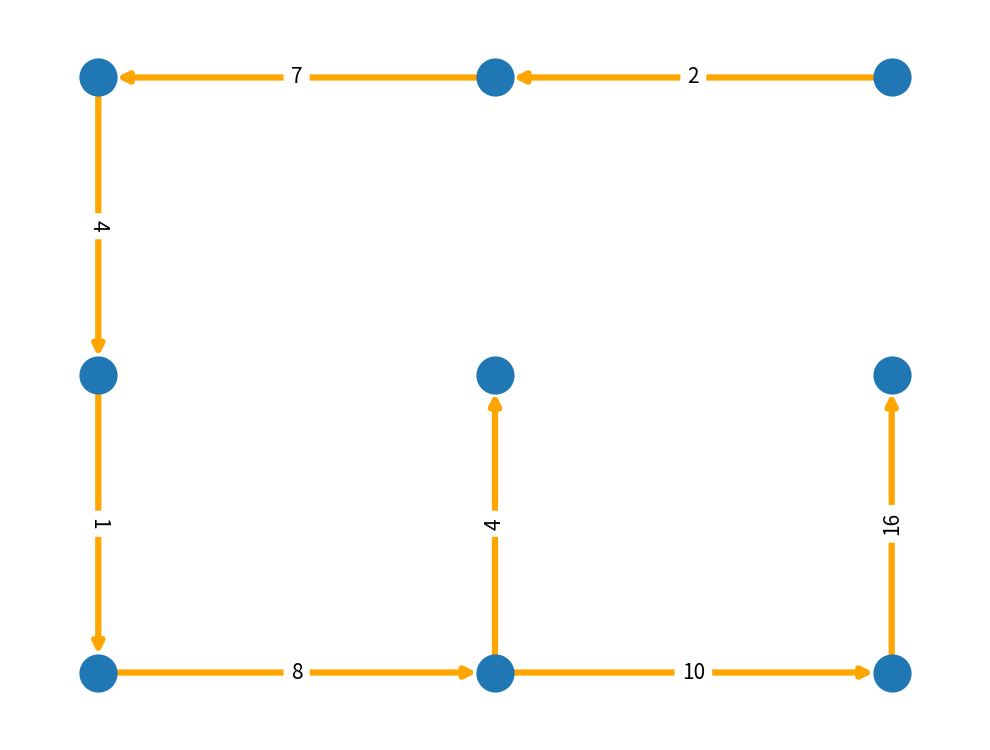

In [15]:
edmonds = nx.tree.Edmonds(D)
sol = edmonds.find_optimum(attr="weight", kind="min", style="arborescence")
edge_labels = {}
for (i,j) in sol.edges():
    edge_labels[i, j] = f"{D[i][j]['weight']}"

nx.draw(D, pos=pos, width=3, edgelist=sol.edges(), edge_color="orange")
nx.draw_networkx_edge_labels(D, pos, edge_labels=edge_labels)
plt.show()